In [1]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse
import pylib.Chebyschev_coefs as ch
colors_ = ["blue", "red", "green", "gray", "black"]
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
path_save_ = "./jupyter-notebooks/NL/results/"

12152
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

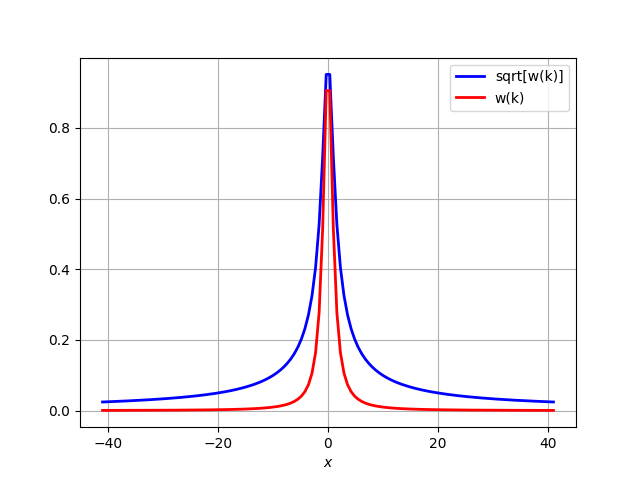

In [3]:
# -------------------------------------------------------------------
# --- Plot weights --- 
# -------------------------------------------------------------------
mix.reload_module(mix)

def func_sqrt_weights(k):
    return np.sqrt(1./ (1 + k**2))

def func_weights(k):
    return 1./ (1 + k**2)

def plot_save(k_max, nk, flag_save):
    Nk = 1 << nk

    # k-grid:
    k = np.linspace(-k_max, k_max, Nk)

    # --- Plotting ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(
        k, func_sqrt_weights(k), 
        color='b', linewidth = 2, linestyle='-',  label = "sqrt[w(k)]"
    )
    ax.plot(
        k, func_weights(k), 
        color='r', linewidth = 2, linestyle='-',  label = "w(k)"
    )
    plt.xlabel('$x$')
    ax.legend()
    plt.grid(True)
    plt.show()
    
    # --- Save the data ---
    if flag_save:
        fname = "weights_profs_k{:d}.dat".format(k_max)
        full_name = path_save_ + "/" + fname
        mix.save_dat_plot_1d_file(full_name, k, func_weights(k))
        
        fname = "weights_sqrt_profs_k{:d}.dat".format(k_max)
        full_name = path_save_ + "/" + fname
        mix.save_dat_plot_1d_file(full_name, k, func_sqrt_weights(k))
    
    return
# ------------------------------------------------------------
plot_save(
    k_max = 40.968, 
    nk = 7, 
    flag_save = False
)

Reading the file ../QuCF/simulations/compute-LCHS-weights//weights_OUTPUT.hdf5...
Name of the simulation is weights
Simulation has been performed  01-29-2024 18:41:59

kmax: 20.0
nk: 10
succ. prob.: 2.729e-01
max. abs. diff: 1.456e-07


<IPython.core.display.Javascript object>


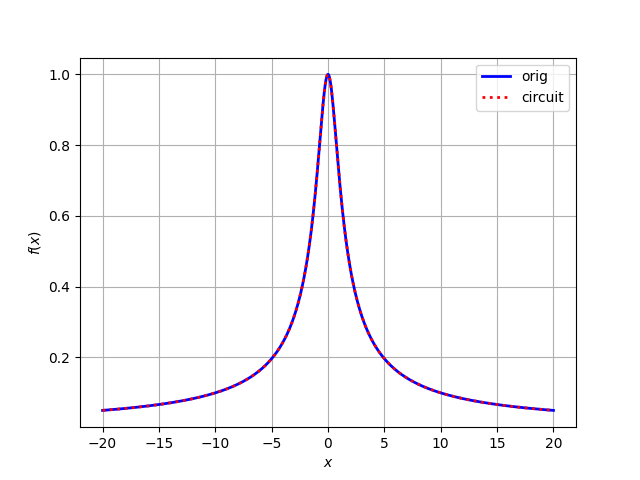

In [8]:
# # --------------------------------------------------------------
# # --- Plot the results from the QSVT LCHS weights simulation ---
# # --------------------------------------------------------------
# mix.reload_module(mix)
# mix.reload_module(mse)

# def read_QSVT_profile():
#     om = mse.MeasOracle__(True)

#     om.path_ = "../QuCF/simulations/LCHS/compute-weights/"
#     om.pname_ = "weights"
#     om.open()
#     om.read_qsvt()

#     # read k-max
#     k_max_c = om.dd_["weights"]["par"]

#     # form k-grid
#     nk_c = om.dd_["regs"]["rk"]
#     Nk_c = 1 << nk_c
#     k_grid_c = np.linspace(-1., 1., Nk_c);

#     # output state
#     # om.set_zero_ancillae_work_states(0)
#     # weights_c = om.get_var_x({}, "rk")

#     # --- read the weights computed by QSVT ---
#     om.set_work_states(0)
#     weights_c = om.get_var_x({"a_be": 0, "a_qsvt": 0, "aref": 0}, "rk")

#     # --- normalization factor ---
#     qsvt_rescaling = om.dd_["weights"]["rescaling_factor"]
#     Hadamart_norm_factor = 2**(nk_c/2) # the rescaling factor appears to the initialization circuit;
#     coef_norm = Hadamart_norm_factor / qsvt_rescaling

#     # --- reference profile ---
#     k = np.linspace(-k_max_c, k_max_c, Nk_c)
#     y_ref = np.sqrt(1/(1 + k**2))

#     # --- Compute the success probability ---
#     succ_prob = np.sum(np.abs(weights_c)**2)
#     print()
#     print("kmax: {:0.1f}".format(k_max_c))
#     print("nk: {:d}".format(nk_c))
#     print("succ. prob.: {:0.3e}".format(succ_prob))
    
#     # --- Absolute difference ---
#     max_abs_diff = np.max(np.abs(y_ref - (-coef_norm * weights_c.real)))
#     print("max. abs. diff: {:0.3e}".format(max_abs_diff))

#     # --- Plot the results ---
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.plot(
#         k, y_ref, 
#         color='b', linewidth = 2, linestyle='-',  
#         label = "orig"
#     )
#     ax.plot(
#         k, -coef_norm * weights_c.real, 
#         color='r', linewidth = 2, linestyle=':',  
#         label = "circuit"
#     )
#     plt.xlabel('$x$')
#     plt.ylabel("$f(x)$")
#     ax.legend()
#     plt.grid(True)
#     plt.show()
    
#     return
# # ---------------------------------------------------------------------------
# read_QSVT_profile()

In [70]:
# ---------------------------------------------------------------------------------------
# --- Scaling of the number of Chebyschev coefficients necessary to implement weights ---
# --- with the desired precision for the chosen kmax.                                 ---
# ---------------------------------------------------------------------------------------
mix.reload_module(mix)

def scaling_success_probability():
    def save_data(kmax, ss_prob):
        mix.save_dat_plot_1d_file(
            path_save_ + "/scan_weights_ss_prob.dat", 
            kmax, 
            ss_prob
        )
        return
    # -------------------------------------------------------------------------

    kmax_s  = [10,        20,        30,        40,        50,        60]
    ss_prob = [3.745e-01, 2.701e-01, 2.240e-01, 1.945e-01, 1.743e-01, 1.593e-01]
    ss_prob = np.array(ss_prob)**2
    save_data(kmax_s, ss_prob)
    return
# --------------------------------------------------------------------------
def scaling_Nd_eps():
    def save_data_eps(Nd, eps, kmax_in):
        N_angles = 2 * (np.array(Nd)/2) - 1
        log_eps = -np.log10(eps) 

        mix.save_dat_plot_1d_file(
            path_save_ + "/scan_Na_eps_kmax{:d}.dat".format(kmax_in), 
            log_eps, 
            N_angles
        )
        return

    def get_data_eps(Nd, eps):
        N_angles = 2 * (np.array(Nd)/2) - 1
        log_eps = np.log10(eps) 
        return N_angles, log_eps
    # -------------------------------------------------------------------------

    kmax_s = 10
    abs_errors = [2.378e-3, 1.512e-04, 1.178e-04, 6.447e-05, 4.188e-05, 2.514e-05, 1.120e-05]
    Nd_pol     = [      50,       120,       150,       250,       350,       500,      1000]
    save_data_eps(Nd_pol, abs_errors, kmax_s)


    kmax_s = 20
    abs_errors = [2.242e-03, 1.555e-04,  2.575e-05, 1.479e-05, 1.263e-05, 5.628e-06]
    Nd_pol     = [      100,       150,        300,       450,       500,      1000]
    save_data_eps(Nd_pol, abs_errors, kmax_s)


    kmax_s = 40
    abs_errors = [2.185e-03, 1.507e-04, 1.085e-05, 4.793e-06, 3.541e-06, 2.817e-06]
    Nd_pol     = [      200,       300,       400,       600,       800,      1000]
    save_data_eps(Nd_pol, abs_errors, kmax_s)


    kmax_s = 60
    abs_errors = [2.165e-03, 1.495e-04, 1.079e-05, 2.361e-06, 1.878e-06]
    Nd_pol     = [      300,       450,       600,       800,      1000]
    save_data_eps(Nd_pol, abs_errors, kmax_s)


    kmax_s = 80
    abs_errors = [2.156e-03, 1.489e-04, 1.075e-05, 1.405e-06]
    Nd_pol     = [      400,       600,       800,      1000]
    save_data_eps(Nd_pol, abs_errors, kmax_s)
    
    return
# --------------------------------------------------------------------------
scaling_success_probability()
scaling_Nd_eps()

write data to a file: ./jupyter-notebooks/NL/results/scan_Na_eps_kmax10.dat
write data to a file: ./jupyter-notebooks/NL/results/scan_Na_eps_kmax20.dat
write data to a file: ./jupyter-notebooks/NL/results/scan_Na_eps_kmax40.dat
write data to a file: ./jupyter-notebooks/NL/results/scan_Na_eps_kmax60.dat
write data to a file: ./jupyter-notebooks/NL/results/scan_Na_eps_kmax80.dat


In [18]:
# ---------------------------------------------------------
# --- Compute angles for the k-grid of the sqrt(weights) ---
# ---------------------------------------------------------
mix.reload_module(mix)
def compute_k_grid_angles(kmax, nk):
    Nk = 1 << nk
    alpha_k0 = - 1.0
    alpha_k1 = np.abs(alpha_k0) * Nk/(Nk - 1)

    print("nk \t{:d}".format(nk))
    print("alpha_k0 \t{:0.12e}".format(alpha_k0))
    print("alpha_k1 \t{:0.12e}".format(alpha_k1))
    return
# ------------------------------------------------------------------------------------
# compute_k_grid_angles(kmax = 40.968, nk = 7) # dk = 6.452e-01
# compute_k_grid_angles(kmax = 10.0, nk = 7)  # dk = 1.575e-01
compute_k_grid_angles(kmax = 20.079, nk = 8)  # dk = 1.575e-01

nk 	8
alpha_k0 	-1.000000000000e+00
alpha_k1 	1.003921568627e+00


Reading the file ../QuCF/simulations/LCHS/weights-AA//AA_OUTPUT.hdf5...
Name of the simulation is AA
Simulation has been performed  05-08-2024 12:22:46


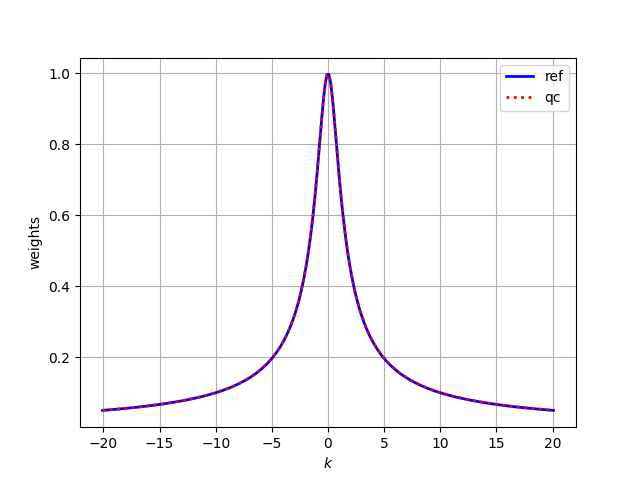

success probability: 9.639858413659e-01
A_max = 2.222691714695e-01


In [22]:
# -----------------------------------------------------------------
# --- QuCF computation of the LCHS weights ---
# -----------------------------------------------------------------

flag_AA = True

# --- Reference signal ---

# nk, kmax = 5, 10
# nk, kmax = 8, 100
# nk, kmax = 9, 100
# nk, kmax = 7, 40.968
# nk, kmax = 7, 10.
nk, kmax = 8, 20.079

Nk = 1 << nk
k = np.linspace(-kmax, kmax, Nk)
dk = np.diff(k)[0]

y_ref = np.sqrt(1./(1 + k**2))

# --- QuCF data ---
om = mse.MeasOracle__(True)
om.path_ = "../QuCF/simulations/LCHS/weights-AA/"
om.pname_ = "AA"
om.open()
om.set_zero_ancillae_work_states(0)
om.read_qsvt()

# --- qucf signal ---
coef_norm = 2**(nk/2.) * 1./om.dd_["weights"]["rescaling_factor"]
y_qc = om.get_var_x({}, "rk") 
succ_prob = np.sum(np.abs(y_qc)**2)

# --- Renormalization of the QC signal ---
y_qc = y_qc.real

if not flag_AA:
    # for non-amplified signal:
    y_qc *= -1.
    y_qc *= coef_norm
else:
    # for amplified signal:
    y_qc *= -1.  # the sign varies !!!
    y_qc = y_qc/np.max(np.abs(y_qc)) * np.max(y_ref)

# --- Plotting results ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k, y_ref, '-b', linewidth = 2, label = "ref")
ax.plot(k, y_qc,  ':r', linewidth = 2, label = "qc")
plt.xlabel('$k$')
plt.ylabel("weights")
ax.legend()
plt.grid(True)
plt.show()

# --- Compute the maximum amplitude ---
y_qc_norm = om.get_var_x({}, "rk")

# --- Print some results ---
print("success probability: {:0.12e}".format(succ_prob))
print("A_max = {:0.12e}".format(np.max(np.abs(y_qc_norm))))

In [23]:
# ----------------------------------------------------------
# --- Amplitude amplification of sqrt(weights) ---
# ----------------------------------------------------------
def print_rr(line_str, A_ampl, A_non_ampl):
    rr = A_ampl / A_non_ampl
    print("{:s}:\t rr = {:0.12e}".format(line_str, rr))
    return
# ---------------------------------------
# *** Here, succ_prob is a non-amplified success probability. ***
def print_NA(line_str, succ_prob):
    theta_AA = np.arcsin(np.sqrt(succ_prob))
    N_AA = int(0.5 * (np.pi/(2.*theta_AA) - 1.))  # +/- 1
    print("{:s}:\t N_AA {:d}".format(line_str, N_AA))
    return
# -----------------------------------------

# --- Compute the ration between amplified and non-amplified signals ---
print_rr("kmax = 10,      nk = 5", 4.156002297806e-01, 1.682383322842e-01)
print_rr("kmax = 40.968,  nk = 7", 4.240889334557e-01, 8.328414714733e-02)
print_rr("kmax = 100,     nk = 8", 4.565726282533e-01, 5.760944577155e-02)
print_rr("kmax = 10,      nk = 7", 2.132800803959e-01, 8.811472985557e-02)
print_rr("kmax = 20.079,  nk = 8", 2.222691714695e-01, 6.168556215840e-02)

# --- Compute the number of repetitions of the AA operator: +/- 1 ---
print()
print_NA("kmax = 10,      nk = 5", 1.428e-01)
print_NA("kmax = 40.968,  nk = 7", 3.670864726304e-02)
print_NA("kmax = 100,     nk = 8", 1.523e-02)
print_NA("kmax = 10,      nk = 7", 1.460374767831e-01)
print_NA("kmax = 20.079,  nk = 8", 7.424705768981e-02)

kmax = 10,      nk = 5:	 rr = 2.470306404836e+00
kmax = 40.968,  nk = 7:	 rr = 5.092072717098e+00
kmax = 100,     nk = 8:	 rr = 7.925308465279e+00
kmax = 10,      nk = 7:	 rr = 2.420481578341e+00
kmax = 20.079,  nk = 8:	 rr = 3.603260855413e+00

kmax = 10,      nk = 5:	 N_AA 1
kmax = 40.968,  nk = 7:	 N_AA 3
kmax = 100,     nk = 8:	 N_AA 5
kmax = 10,      nk = 7:	 N_AA 1
kmax = 20.079,  nk = 8:	 N_AA 2


In [ ]:
# ---------------------------------------------------------
# --- Compute correcting angles for the sqrt(weights) ---
# ---------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(mse)
from scipy.optimize import fsolve

def compute_BE_angles(kmax, nk):
    def compute_corr():
        # !!! Attention !!!
        # the correction angles is computed from a QuCF computation performed
        # without the correcting gates:

        om = mse.MeasOracle__(True)
        om.path_ = "../QuCF/tests/compute-weights/"
        om.pname_ = "weights"
        om.open()
        om.set_work_states(0)
        res_k0 = om.get_var_x({"a_be": 0, "rk": 0}, "a_qsvt") 

        def func_to_solve(x):
            aa = res_k0[0]
            aas = res_k0[1]
            return [aa * np.cos(x[0]/2.) - 1j*np.sin(x[0]/2.)*aas - aa / np.sqrt(2.)]

        res = fsolve(func_to_solve, [0.1])

        print("recheck: {:20.3e}".format(func_to_solve(res)[0]))
        print()

        return res[0] 
    # -------------------------------------------------------
    Nk = 1 << nk
    alpha_k_corr = compute_corr()
    print("alpha_k_corr \t{:0.12e}".format(alpha_k_corr))

    del alpha_k0, alpha_k1
# ------------------------------------------------------------------------------------
compute_BE_angles(
    kmax = 10,
    nk = 14
)